In [18]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix

# Define image dimensions for preprocessing
height = 300
width = 300

# Define directories for training and validation data
train_dir = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Training"
validation_dir = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Validation"

# Number of batches for data generators
batch_size = 16

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Data augmentation for validation images
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Creating data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EfficientNetB0 model without top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(height, width, 3))

# Add custom top layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine base model with custom top layers
finetune_model = Model(inputs=base_model.input, outputs=predictions)

Found 741 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


Found 741 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8419 - loss: 0.7781
Epoch 1: val_accuracy improved from -inf to 0.94167, saving model to best_model_50rs.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 662s 12s/step - accuracy: 0.8440 - loss: 0.7685 - val_accuracy: 0.9417 - val_loss: 1.1796 - learning_rate: 1.0000e-04
Epoch 2/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Validation error encountered, continuing with training data only.
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 728ms/step - accuracy: 0.9977 - loss: 0.0308 - learning_rate: 1.0000e-04
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 687ms/step - accuracy: 0.9955 - loss: 0.0052 - learning_rate: 1.0000e-04
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 682ms/step - accuracy: 0.9987 - loss: 0.0229 - learning_rate: 1.0000e-04
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 755ms/step - accuracy: 0.9892 - loss: 0.0471 - learning_rate: 1.0000e-04
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 704ms/step - accuracy: 0.9928 - loss: 0.0642 - learning_rate: 1.0000e-04
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 674ms/step - accura

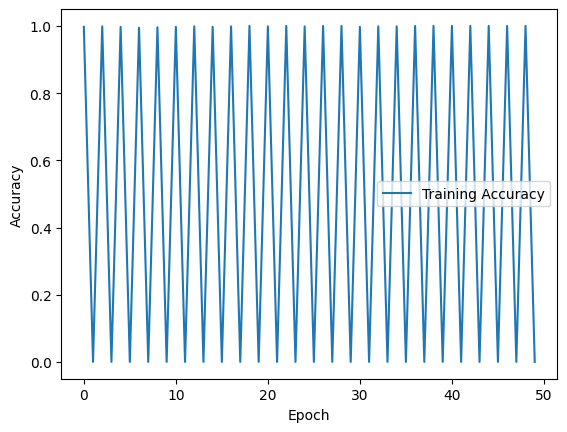

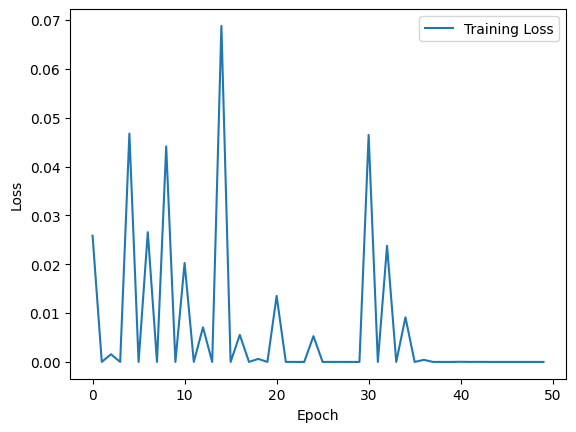

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


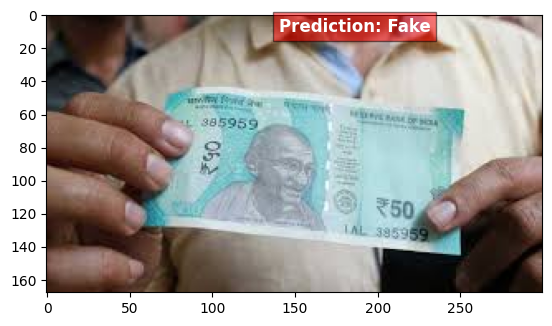

Prediction: Fake
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 586ms/step


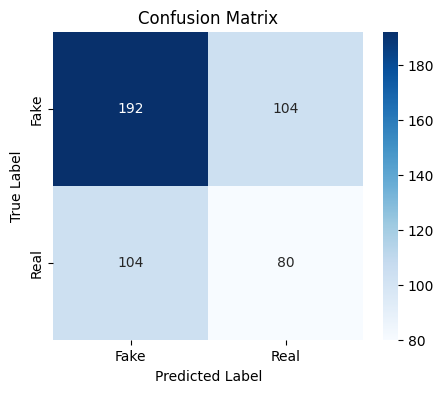

In [4]:


# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model
finetune_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Calculate steps per epoch
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

# Checkpoint, early stopping, and learning rate reduction on plateau
checkpoint = ModelCheckpoint("best_model_50rs.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=15, verbose=1, mode='max', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

# Train the model with a fallback on just training accuracy if validation fails
try:
    history = finetune_model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=[checkpoint, early_stop, reduce_lr]
    )
except AttributeError as e:
    print("Validation error encountered, continuing with training data only.")
    history = finetune_model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=50,
        callbacks=[checkpoint, early_stop, reduce_lr]
    )

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing the model
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(height, width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Real"
    else:
        return "Fake"

# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/Fake/1.jpeg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

# Evaluate the model on the validation set if possible
if 'val_accuracy' in history.history:
    overall_accuracy = finetune_model.evaluate(validation_generator, steps=validation_steps, verbose=1)
    print("Validation Accuracy:", overall_accuracy[1])

# Confusion Matrix
validation_generator.reset()
predictions = finetune_model.predict(validation_generator, steps=validation_steps, verbose=1)
predicted_classes = (predictions > 0.5).astype(int)
true_classes = validation_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


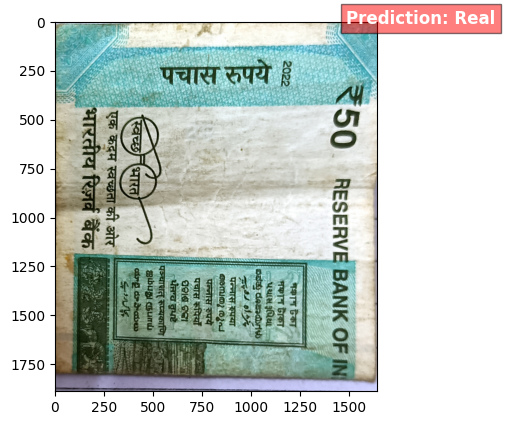

Prediction: Real


In [5]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812203621.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


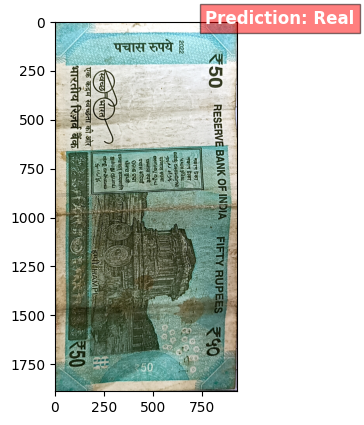

Prediction: Real


In [7]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812203720.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


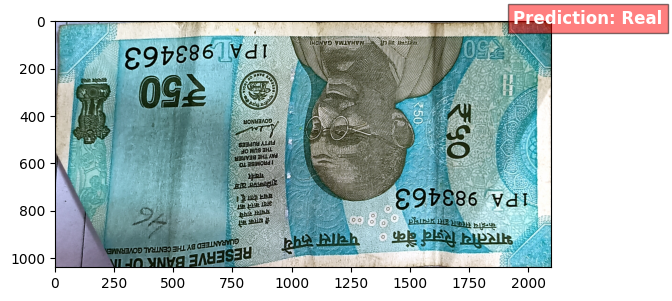

Prediction: Real


In [8]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812203736.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


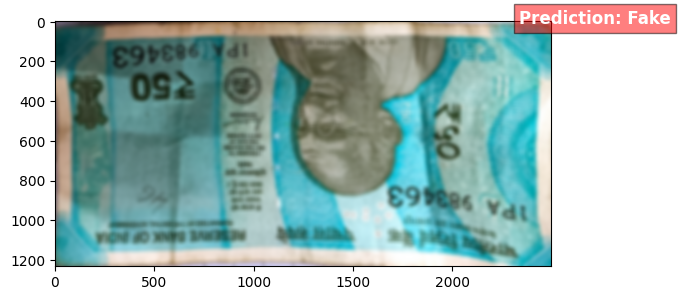

Prediction: Fake


In [9]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812203801-modified (1).jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


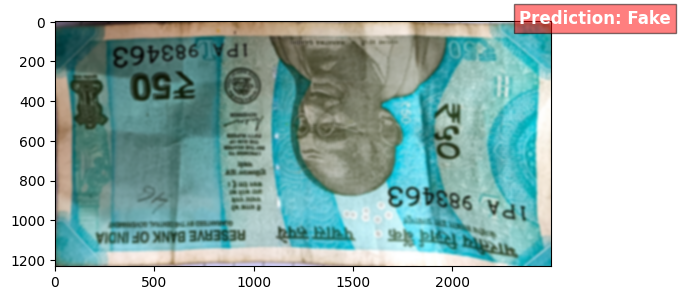

Prediction: Fake


In [10]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812203801-modified.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


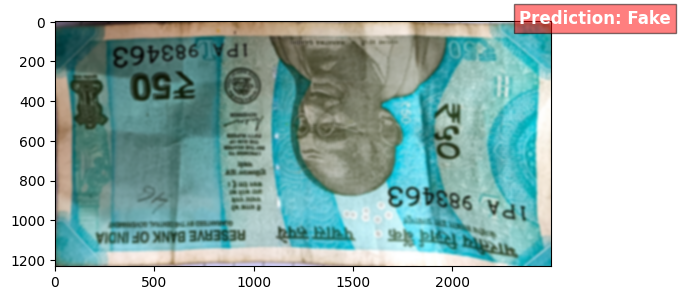

Prediction: Fake


In [11]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812203801-modified.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


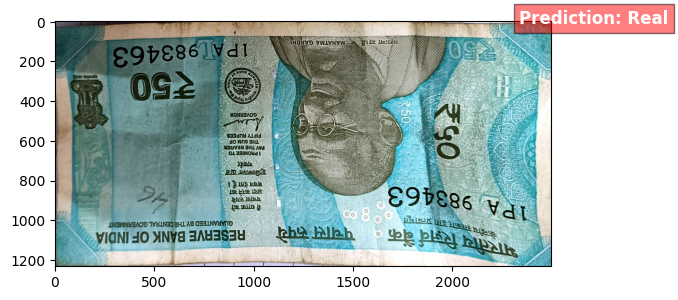

Prediction: Real


In [12]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812203801.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


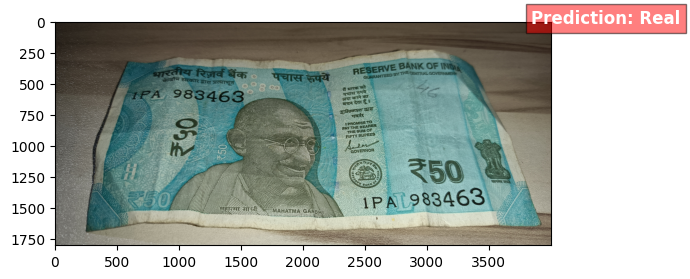

Prediction: Real


In [13]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812221142.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


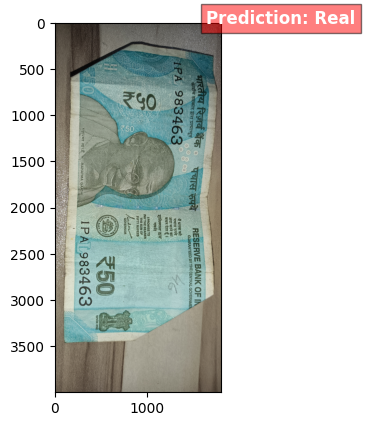

Prediction: Real


In [14]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812221036.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


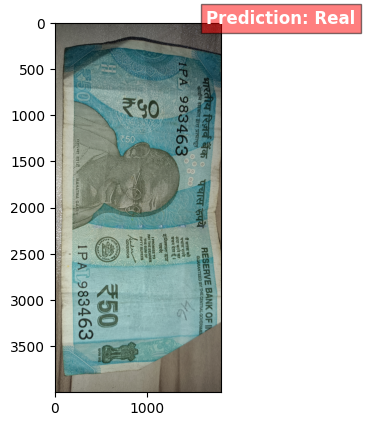

Prediction: Real


In [15]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812221059.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


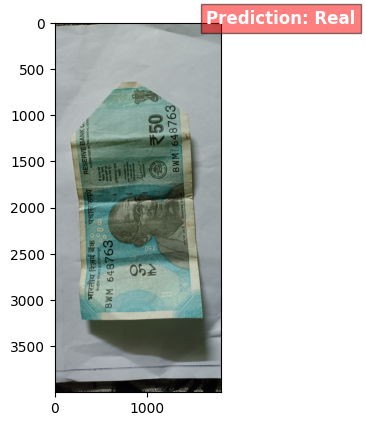

Prediction: Real


In [16]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812212137.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


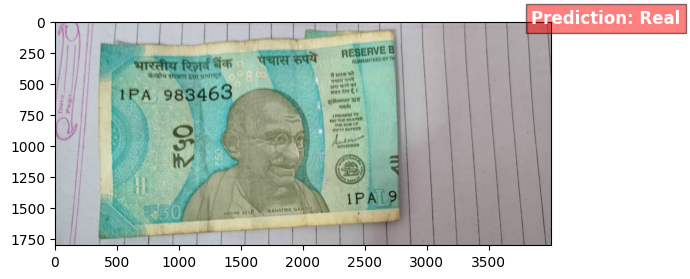

Prediction: Real


In [17]:
# Specify the image path for testing
test_img_path = "/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Testing/IMG20240812204049.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10, f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

In [23]:
from tensorflow.keras.models import Model

# Create a model that outputs the top_conv layer
conv_model = Model(inputs=finetune_model.input, outputs=finetune_model.get_layer("top_conv").output)

# Get the output of the top_conv layer
conv_output = conv_model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [26]:
for layer in finetune_model.layers:
    layer.trainable = True


In [27]:
img_array = np.expand_dims(img_array, axis=0)  # Ensure input has correct batch dimensions


In [29]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 23.2 MB/s eta 0:00:00


In [30]:
import shap
import numpy as np

# Assume 'model' is your trained model and 'X' is your input data with 16 features
# If not loaded, load your model and data here


In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset on Google Drive
train_dir = '/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Training'
val_dir = '/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Validation'

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

# Load your model
model = tf.keras.models.load_model('/content/best_model_50rs.keras')


Found 741 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [36]:
!pip install shap


In [38]:
sample = next(val_generator)[0]  # Get a batch of images
sample = sample[:1]  # Take the first image in the batch


In [44]:
pip uninstall tensorflow


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
Y
  Successfully uninstalled tensorflow-2.17.0


In [45]:
pip install tensorflow==2.12.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    U

In [46]:
pip install tf-explain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf

# Set up paths to your data directories
train_dir = '/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Training'
val_dir = '/content/drive/MyDrive/MINIPROJECT/50 Rs/Dataset(50)/Validation'

# Define image size and batch size
img_size = (300, 300)
batch_size = 32

# Create training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size
)


Found 741 files belonging to 2 classes.
Found 480 files belonging to 2 classes.


In [3]:
# Create a generator from the validation dataset
val_generator = val_dataset.as_numpy_iterator()


In [9]:
import numpy as np
import tensorflow as tf

def compute_integrated_gradients(model, x, baseline, class_index, steps=50):
    # Define the function to compute gradients
    def compute_gradients(inputs, target_class):
        with tf.GradientTape() as tape:
            tape.watch(inputs)
            predictions = model(inputs, training=False)
            loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(target_class, predictions))
        grads = tape.gradient(loss, inputs)
        return grads

    # Step 1: Compute the scaled inputs
    alphas = np.linspace(0, 1, num=steps)
    scaled_inputs = [(baseline + alpha * (x - baseline)) for alpha in alphas]

    # Step 2: Compute gradients for each scaled input
    grads_list = []
    for scaled_input in scaled_inputs:
        scaled_input = tf.convert_to_tensor(scaled_input, dtype=tf.float32)
        grads = compute_gradients(scaled_input, class_index)
        grads_list.append(grads)

    # Step 3: Average gradients and multiply by (x - baseline)
    avg_grads = np.mean(grads_list, axis=0)
    integrated_grads = (x - baseline) * avg_grads

    return integrated_grads

# Get a sample from the validation dataset
sample = next(val_generator)[0][0:1]  # Adjust as needed
baseline = np.zeros_like(sample)

# Compute predictions to get the class index
predictions = finetune_model(sample, training=False)
class_index = np.argmax(predictions)

# Compute integrated gradients
integrated_grads = compute_integrated_gradients(finetune_model, sample, baseline, class_index)


In [11]:
def compute_integrated_gradients(model, x, baseline, class_index, steps=50):
    def compute_gradients(inputs, target_class):
        with tf.GradientTape() as tape:
            tape.watch(inputs)
            predictions = model(inputs, training=False)
            loss = tf.keras.losses.sparse_categorical_crossentropy(target_class, predictions)
        grads = tape.gradient(loss, inputs)
        return grads

    alphas = np.linspace(0, 1, num=steps)
    scaled_inputs = [(baseline + alpha * (x - baseline)) for alpha in alphas]

    grads_list = []
    for scaled_input in scaled_inputs:
        scaled_input = tf.convert_to_tensor(scaled_input, dtype=tf.float32)
        grads = compute_gradients(scaled_input, class_index)
        grads_list.append(grads)

    avg_grads = np.mean(grads_list, axis=0)
    integrated_grads = (x - baseline) * avg_grads
    return integrated_grads

def get_feature_importance(model, sample, baseline, class_index):
    integrated_grads = compute_integrated_gradients(model, sample, baseline, class_index)
    feature_importance = np.mean(np.abs(integrated_grads), axis=(0, 1, 2))
    return feature_importance


In [12]:
sample = next(val_generator)[0][0:1]  # Ensure this is correctly shaped
baseline = np.zeros_like(sample)  # Should be of the same shape as sample


In [18]:
import cv2

# Load an example image corresponding to the note
image = cv2.imread('/path/to/note_image.jpg')
image = cv2.resize(image, (224, 224))  # Resize to match model's expected input
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Predict using the model
predictions = finetune_model.predict(image)
class_index = np.argmax(predictions[0])

# Now, proceed with the steps to evaluate feature importances.


InvalidArgumentError: Graph execution error:

Detected at node 'model/normalization/sub' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-18-17ab34cc697d>", line 28, in <cell line: 28>
      predictions = finetune_model.predict(sample_features)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2111, in predict_step
      return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/layers/preprocessing/normalization.py", line 361, in call
      return (inputs - self.mean) / tf.maximum(
Node: 'model/normalization/sub'
Incompatible shapes: [1,16] vs. [1,1,1,3]
	 [[{{node model/normalization/sub}}]] [Op:__inference_predict_function_977672]